In [1]:
import os
from PIL import Image

base_dir = ('D:\KULIAH\Skripsi\DATASET\Warung Botol')

In [2]:
# menentukan direktori
train_dir = os.path.join(base_dir, 'train_tutup')
validation_dir = os.path.join(base_dir, 'validasi_tutup')

In [3]:
# menentukan direktori isi folder training

PET_train_dir = os.path.join(train_dir, 'PET')
HDPE_train_dir = os.path.join(train_dir, 'HDPE')

print("Jumlah Data Train Tiap Kelas")
print('jumlah gambar train PET :', len(os.listdir(PET_train_dir)))
print('jumlah gambar train HDPE :', len(os.listdir(HDPE_train_dir)))

Jumlah Data Train Tiap Kelas
jumlah gambar train PET : 76
jumlah gambar train HDPE : 74


In [4]:
# menentukan direktori isi folder validasi
PET_val_dir = os.path.join(validation_dir, 'PET')
HDPE_val_dir = os.path.join(validation_dir, 'HDPE')

print("Jumlah Data Validasi Tiap Kelas")
print('jumlah gambar validasi PET :', len(os.listdir(PET_val_dir)))
print('jumlah gambar validasi HDPE :', len(os.listdir(HDPE_val_dir)))

Jumlah Data Validasi Tiap Kelas
jumlah gambar validasi PET : 16
jumlah gambar validasi HDPE : 15


In [5]:
# preprocessing

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                  rescale = 1/64,
                  rotation_range = 15,
                  horizontal_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'nearest',
                  width_shift_range = 0.1,
                  height_shift_range = 0.3,
                  zoom_range = 0.4
)

val_datagen = ImageDataGenerator(
                  rescale = 1/64,
                  rotation_range = 15,
                  horizontal_flip = True,
                  shear_range = 0.2,
                  fill_mode = 'nearest',
                  width_shift_range = 0.1,
                  height_shift_range = 0.3,
                  zoom_range = 0.4
)
 

In [6]:
# target

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 5,
    class_mode = 'categorical'
)

Found 150 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [7]:
# model CNN

model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(16,(4,4), activation = 'relu', input_shape = (150,150,3)),
          tf.keras.layers.MaxPooling2D(3,3),
          tf.keras.layers.Conv2D(16,(4,4), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(3,3),
          tf.keras.layers.Conv2D(16,(4,4), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(3,3),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128,activation = 'relu'),
          tf.keras.layers.Dropout(0.5, seed = 128),
          tf.keras.layers.Dense(2,activation = 'sigmoid'),
])

In [8]:
# ringkasan model CNN

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 147, 147, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        4112      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        4112      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

In [9]:
# compile model

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [17]:
# model training
history = model.fit( 
            train_generator,
            steps_per_epoch = 5 ,
            epochs = 30,
            validation_data = val_generator,
            validation_steps = 1,
            verbose = 1
)

# print(result)
print(history.history.keys())
print((history.history.values()))

Epoch 1/30
5/5 [==============================] - 1s 278ms/step - loss: 0.0327 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 2/30
5/5 [==============================] - 1s 193ms/step - loss: 0.0897 - accuracy: 0.9600 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 1s 205ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 1s 239ms/step - loss: 0.0705 - accuracy: 0.9600 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 1s 180ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 1s 180ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 8.1339e-04 - val_accuracy: 1.0000
Epoch 7/30
5/5 [==============================] - 1s 183ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.2235e-04 - val_accuracy: 1.0000
Epoch 8/30
5

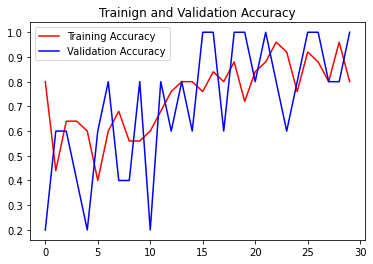

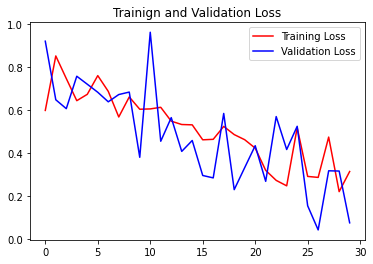

In [11]:
# grafik akurasi

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Trainign and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Trainign and Validation Loss')
plt.legend(loc = 'best')
plt.show()
